# Data Preprocessing

In order to achieve clean datasets, we do data perprocessing for our collected images including data clean and data normalization. 

1. In data clean step, we delete gray fruit images by checking the image shape using PIL python library. Besides, we delete duplicated Images to avoid overfitting to these images. During data exploration, we observe some poor-quality images that do not contain any fruits but unrelated objects. We also delete these images to avoid noise when training model. 

2. In data normalization step, we mainly focus on balancing the image number for each fruit category and normalize all the image shape. Since we collect the real-world fruit images in seven categories (apples, pineapple, apple, banana, strawberry, pear, watermelon, grapes), we reduce the image number to 5000 for all the categories, so that we expect our model can fairly have good performance on all the fruit catogories.

---
To download our dataset, please go to our google drive page.\
Raw Image Dataset: https://drive.google.com/drive/folders/1mcvubLGu17ZVKTGvG_nKS-u00cKZjaGo?usp=share_link

---

In order to test the preproceesing function, please make sure the data follow the folder structure:\
\- data_preprocessing.ipynb\
\- Flickr_scrape\
\- resize_realworld\
\- realworld

\

The following cell is to help create such folder structure:

In [10]:
import PIL
from PIL import Image
import os 
import matplotlib.pyplot as plt

In [11]:
if not os.path.exists('./resize_realworld'):
    os.mkdir('./resize_realworld')
if not os.path.exists('./realworld'):
    os.mkdir('./realworld')

for fruit in QURIES:
    if not os.path.exists('./resize_realworld/'+fruit):
        os.mkdir('./resize_realworld/'+fruit)
    if not os.path.exists('./realworld/'+fruit):
        os.mkdir('./realworld/'+fruit)

## Crop and Resize Image

In [ ]:
QURIES = ['pineapple', 'apple', 'banana', 'strawberry', 'pear', 'watermelon', 'grapes']  

for fruit in QURIES:
    dir_path = './Flickr_scrape/' + fruit + '/'
    tgt_path = './resize_realworld/' + fruit + '/'
    for i in range(1,8000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        im = Image.open(image_path)
        image_size = (255,255)
        width, hight = im.size
        min_square = min(width,hight)
        if not (width < 255 or hight <255):
            left = width/2-min_square/2
            right = width/2+min_square/2
            upper = hight/2-min_square/2
            bottom = hight/2+min_square/2
            im = im.crop((left, upper, right, bottom))
            im = im.resize(image_size)
            im.save(tgt_path + str(i) +".jpg")
        if i % 1000 == 0:
            print(f'Save {i} Imgaes Now!')


## Rename Image

In [2]:
import PIL
from PIL import Image
import os 

QURIES = ['pineapple', 'apple', 'banana', 'strawberry', 'pear', 'watermelon', 'grapes']  

for fruit in QURIES:
    dir_path = './resize_realworld/' + fruit + '/'
    tgt_path = './realworld/' + fruit + '/'
    count = 0
    for i in range(1,8000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        im = Image.open(image_path)
        im.save(tgt_path + str(count) +".jpg")
        count += 1
        if count % 1000 == 0:
            print(f'Save {i} Imgaes Now!')
        if count == 5000:
            print('Done!!')
            break

# Split Dataset into Train and Test

In this section, we split datast in train and test. All the images are saved in numpy array (.npz file)

## Realworld Train Dataset

In [ ]:
import numpy as np
import imageio.v2 as imageio
import os
fruits = ['pear', 'pineapple','apple','watermelon','grapes','banana','strawberry']

realworld= {}

for fruit in fruits:
    imgs = []
    dir_path = './realworld/' + fruit + '/'
    for i in range(4000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        temp_img = imageio.imread(image_path, pilmode='RGB')
        if temp_img.shape != (255,255,3):
            print(f'temp img shape {temp_img.shape}')
        imgs.append(temp_img)

    realworld[fruit] = np.asarray(imgs)[:,:,:,:]

np.savez_compressed('./compressed_realworld_train', apple = realworld['apple'], pear = realworld['pear'], banana = realworld['banana'], grapes = realworld['grapes'], pineapple = realworld['pineapple'], watermelon = realworld['watermelon'], strawberry = realworld['strawberry'])

In [ ]:
realworld.keys()

In [ ]:
for key in realworld.keys():
    print(realworld[key].shape)

## Realworld Test Dataset

In [ ]:
import numpy as np
import imageio.v2 as imageio
import os
fruits = ['pear', 'pineapple','apple','watermelon','grapes','banana','strawberry']

realworld= {}

for fruit in fruits:
    imgs = []
    dir_path = './realworld/' + fruit + '/'
    for i in range(4000,5000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        temp_img = imageio.imread(image_path, pilmode='RGB')
        if temp_img.shape != (255,255,3):
            print(f'temp img shape {temp_img.shape}')
        imgs.append(temp_img)

    realworld[fruit] = np.asarray(imgs)[:,:,:,:]
    

In [ ]:
np.savez_compressed('./compressed_realworld_test', apple = realworld['apple'], pear = realworld['pear'], banana = realworld['banana'], grapes = realworld['grapes'], pineapple = realworld['pineapple'], watermelon = realworld['watermelon'], strawberry = realworld['strawberry'])

## Quickdraw Train Dataset

In [34]:
import numpy as np
import imageio.v2 as imageio
import os
fruits = ['apple','pear', 'banana','grapes','pineapple','watermelon','strawberry']

quickdraw= {}

for fruit in fruits:
    imgs = []
    dir_path = '/Users/apple/Desktop/CS5242Project/quickdraw/'+ fruit + '/'
    for i in range(4000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        temp_img = imageio.imread(image_path, pilmode='RGB')
        if temp_img.shape != (255,255,3):
            print(f'temp img shape {temp_img.shape}')
        imgs.append(temp_img)
        
    quickdraw[fruit] = np.asarray(imgs)[:,:,:,:]
    

In [35]:
quickdraw.keys()

dict_keys(['apple', 'pear', 'banana', 'grapes', 'pineapple', 'watermelon', 'strawberry'])

In [36]:
for key in quickdraw.keys():
    print(key,quickdraw[key].shape)

apple (4000, 255, 255, 3)
pear (4000, 255, 255, 3)
banana (4000, 255, 255, 3)
grapes (4000, 255, 255, 3)
pineapple (4000, 255, 255, 3)
watermelon (4000, 255, 255, 3)
strawberry (4000, 255, 255, 3)


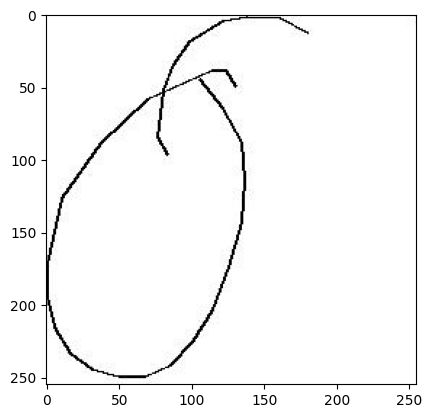

In [38]:
import matplotlib.pyplot as plt

plt.imshow(quickdraw['apple'][0])


In [39]:
np.savez_compressed('./compressed_quickdraw_train', apple = quickdraw['apple'], pear = quickdraw['pear'], banana = quickdraw['banana'], grapes = quickdraw['grapes'], pineapple = quickdraw['pineapple'], watermelon = quickdraw['watermelon'], strawberry = quickdraw['strawberry'])

In [40]:
quickdraw_npy = np.load('./compressed_quickdraw_train.npz')
quickdraw_npy = dict(quickdraw_npy)

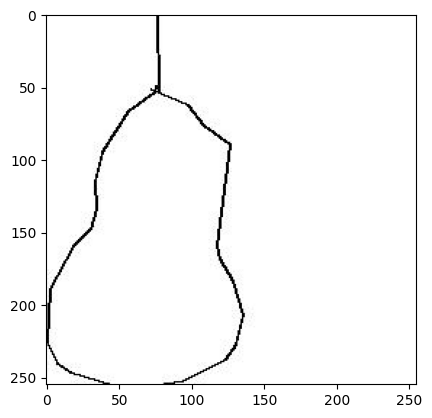

In [41]:
plt.imshow(quickdraw_npy['pear'][1])

## Quickdraw Test Dataset

In [42]:
import numpy as np
import imageio.v2 as imageio
import os
fruits = ['apple','pear', 'banana','grapes','pineapple','watermelon','strawberry']

quickdraw= {}

for fruit in fruits:
    imgs = []
    dir_path = '/Users/apple/Desktop/CS5242Project/quickdraw/'+ fruit + '/'
    for i in range(4000,5000):
        image_path = dir_path + str(i) +".jpg"
        if not os.path.exists(image_path):
            continue
        temp_img = imageio.imread(image_path, pilmode='RGB')
        if temp_img.shape != (255,255,3):
            print(f'temp img shape {temp_img.shape}')
        imgs.append(temp_img)
        
    quickdraw[fruit] = np.asarray(imgs)[:,:,:,:]


In [43]:
for key in quickdraw.keys():
    print(key,quickdraw[key].shape)

apple (1000, 255, 255, 3)
pear (1000, 255, 255, 3)
banana (1000, 255, 255, 3)
grapes (1000, 255, 255, 3)
pineapple (1000, 255, 255, 3)
watermelon (1000, 255, 255, 3)
strawberry (1000, 255, 255, 3)


In [44]:
np.savez_compressed('./compressed_quickdraw_test', apple = quickdraw['apple'], pear = quickdraw['pear'], banana = quickdraw['banana'], grapes = quickdraw['grapes'], pineapple = quickdraw['pineapple'], watermelon = quickdraw['watermelon'], strawberry = quickdraw['strawberry'])